# Data Science Challenge

In [1]:
# To install packages that are not installed by default, uncomment the last two lines of this cell 
# and replace <package list> with a list of packages to import.
# This will ensure the notebook has all the dependencies and works everywhere.

#import sys
#!{sys.executable} -m pip install <package list>

In [13]:
pip install imblearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 kB 4.8 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Libraries
import pandas as pd
pd.set_option("display.max_columns", 101)

In [15]:
# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Pre-requisites
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Store the classifier models to save time
import joblib

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Classifiers from scikit-learn
from sklearn.ensemble import RandomForestClassifier

# Performance metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Regressors from scikit-learn
from sklearn.ensemble import RandomForestRegressor

# Performance metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Imbalanced dataset helpers
from imblearn.over_sampling import SMOTE

## Data Description

Column | Description
:---|:---
`id` | Identification number for the flight.
`dep_stn` | Departure point.
`arr_stn` | Arrival point.
`ac_code` | Aircraft Code. 
`dep_date` | Scheduled departure date.	
`arr_date` | Scheduled arrival date.
`weather` | Observed weather conditions at departure.
`hobbs_meter` | The time in hours that an aircraft has been in use.
`year_man` | Year of manufacturer for the aircraft.
`dep_country` | Departure country.
`arr_country` | Destination country.
`delay` | Number of minutes a flight was delayed.

## Data Wrangling & Visualization

In [4]:
# Dataset is already loaded below
data = pd.read_csv("train.csv")

In [5]:
data.head()

,id,dep_stn,arr_stn,ac_code,dep_date,arr_date,weather,hobbs_meter,year_man,dep_country,arr_country,delay
0,TU 0930,TUN,MRS,TU 32AIMD,2016-01-01 07:55:00,2016-01-01 09.30.00,sunny,4390,2004-08,Tunisia,France,18.0
1,TU 0526,TUN,DUS,TU 736IOQ,2016-01-01 08:20:00,2016-01-01 11.05.00,rainy,5882,2010-01,Tunisia,Germany,39.0
2,TU 0718,TUN,ORY,TU 320IMU,2016-01-01 10:05:00,2016-01-01 12.25.00,foggy,6117,2011-03,Tunisia,France,14.0
3,TU 0997,NCE,TUN,TU 320IMT,2016-01-01 10:15:00,2016-01-01 11.50.00,sunny,8941,2010-01,France,Tunisia,25.0
4,TU 0700,TUN,GVA,TU 320IMV,2016-01-01 12:40:00,2016-01-01 14.35.00,stormy,4301,2004-08,Tunisia,Switzerland,21.0


In [7]:
#Explore columns
data.columns

Index(['id', 'dep_stn', 'arr_stn', 'ac_code', 'dep_date', 'arr_date',
       'weather', 'hobbs_meter', 'year_man', 'dep_country', 'arr_country',
       'delay'],
      dtype='object')

In [8]:
#Description
data.describe()

,hobbs_meter,delay
count,5000.000000,5000.000000
mean,6017.559600,21.016600
std,1433.121879,12.324378
min,3464.000000,1.000000
25%,4516.000000,10.000000
50%,6303.000000,19.000000
75%,6909.000000,30.000000
max,9200.000000,49.000000


In [6]:
#Checking for nullvalues
data.isna().sum()

id             0
dep_stn        0
arr_stn        0
ac_code        0
dep_date       0
arr_date       0
weather        0
hobbs_meter    0
year_man       0
dep_country    0
arr_country    0
delay          0
dtype: int64

In [9]:
#Seperating Label and feature
labels = data[["delay"]]
features = data.drop(columns = ['delay'])
labels.head()

,delay
0,18.0
1,39.0
2,14.0
3,25.0
4,21.0


In [16]:
print(f"\nDataset shape: {data.shape}")
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.20, random_state=42)
print(f"features_train shape: {features_train.shape} | features_test shape: {features_test.shape}")
print(f"labels_train shape: {labels_train.shape} | labels_test shape: {labels_test.shape}")


Dataset shape: (5000, 12)
features_train shape: (4000, 11) | features_test shape: (1000, 11)
labels_train shape: (4000, 1) | labels_test shape: (1000, 1)


In [18]:
classification_features_train, classification_features_test = features_train, features_test
classification_labels_train, classification_labels_test = labels_train["delay"], labels_test["delay"]
print(f"classification_features_train shape: {classification_features_train.shape} | classification_features_test shape: {classification_features_test.shape}")
print(f"classification_labels_train shape: {classification_labels_train.shape} | classification_labels_test shape: {classification_labels_test.shape}")


classification_features_train shape: (4000, 11) | classification_features_test shape: (1000, 11)
classification_labels_train shape: (4000,) | classification_labels_test shape: (1000,)


In [23]:
classification_features_train.head()

,id,dep_stn,arr_stn,ac_code,dep_date,arr_date,weather,hobbs_meter,year_man,dep_country,arr_country
4227,TU 4860,TUN,AYT,TU 320IMR,2017-08-16 19:10:00,2017-08-16 21.40.00,sunny,5351,2003-02,Tunisia,Turkey
4676,TU 0643,VIE,TUN,TU 32AIMP,2017-10-01 16:50:00,2017-10-01 19.00.00,cloudy,7307,2007-05,Austria,Tunisia
800,TU 0251,NCE,MIR,TU 32AIMN,2016-04-11 15:50:00,2016-04-11 17.30.00,rainy,7003,2007-05,France,Tunisia
3671,TU 0902,TUN,MRS,TU 332IFN,2017-06-16 11:25:00,2017-06-16 13.00.00,windy,6374,2009-04,Tunisia,France
4193,TU 0339,ALG,TUN,PS 738PSD,2017-08-13 10:30:00,2017-08-13 11.40.00,windy,4502,2008-12,Algeria,Tunisia


In [30]:
data['yearof_man'] = pd.DatetimeIndex(data['year_man']).year
data.head()

,id,dep_stn,arr_stn,ac_code,dep_date,arr_date,weather,hobbs_meter,year_man,dep_country,arr_country,delay,yearof_man
0,TU 0930,TUN,MRS,TU 32AIMD,2016-01-01 07:55:00,2016-01-01 09.30.00,sunny,4390,2004-08,Tunisia,France,18.0,2004
1,TU 0526,TUN,DUS,TU 736IOQ,2016-01-01 08:20:00,2016-01-01 11.05.00,rainy,5882,2010-01,Tunisia,Germany,39.0,2010
2,TU 0718,TUN,ORY,TU 320IMU,2016-01-01 10:05:00,2016-01-01 12.25.00,foggy,6117,2011-03,Tunisia,France,14.0,2011
3,TU 0997,NCE,TUN,TU 320IMT,2016-01-01 10:15:00,2016-01-01 11.50.00,sunny,8941,2010-01,France,Tunisia,25.0,2010
4,TU 0700,TUN,GVA,TU 320IMV,2016-01-01 12:40:00,2016-01-01 14.35.00,stormy,4301,2004-08,Tunisia,Switzerland,21.0,2004


In [24]:
col_list = data["dep_stn"].values.tolist()
print(list(set(col_list)))

['ABJ', 'BUD', 'GNB', 'LED', 'SXF', 'MED', 'TUN', 'BTS', 'MAD', 'SXB', 'BRU', 'DKR', 'MRS', 'OUA', 'OPO', 'JED', 'DUS', 'IST', 'OUD', 'CKY', 'VIE', 'TNG', 'PRG', 'CGN', 'MXP', 'CZL', 'CRL', 'AMS', 'NDR', 'MIR', 'LGW', 'MLA', 'ORY', 'NCE', 'BEY', 'CMN', 'CAI', 'ORN', 'SKG', 'HAM', 'LIS', 'MUC', 'BCN', 'GVA', 'PMO', 'NIM', 'NAP', 'ZRH', 'LYS', 'BKO', 'DJE', 'ALG', 'AHU', 'FRA', 'FCO', 'CDG', 'VCE', 'SVO', 'AYT', 'OSR', 'KGL', 'YUL', 'LHR', 'NKC', 'BEG', 'BOD', 'BRQ', 'NTE', 'TOE', 'TLS']


In [25]:
col_list = data["ac_code"].values.tolist()
print(list(set(col_list)))

['UG AT7LBE', 'D4 320CQP', 'TU 320IMV', 'TU 320IMR', 'TU 320IMT', 'D4 319CQG', 'TU 32AIMP', 'TU 32AIMH', 'TU 736IOR', 'TU 736IOQ', 'UJ 320TCF', 'TU 32AIMN', 'TU 31AIMK', 'TU 32AIML', 'TU 332IFN', 'UG AT7LBD', 'TU 736IOK', '5M 343SUN', 'QS 738TSC', 'TU 31BIMQ', 'TU 32AIMD', 'TU 32AIMI', 'TU 736IOL', '5K 343TQY', 'TU 31BIMO', 'TU 320IMU', 'TU CR9ISA', 'TU 736IOM', 'BJ 320INP', 'BJ 320INR', 'TU 31AIMJ', 'TU 320IMS', 'BJ 320INC', 'PS 738PSD', 'TU 332IFM', '5M 343JAI', 'TU 320IMW', 'TU 32AIMM', 'TU 32AIMG', 'BJ 320INQ', 'BJ 320INA', 'TU 736ION', '5K 345TFX', 'TU 32AIMC', 'GW 320MQH', 'TU 32AIMF', 'TU 736IOP']


In [26]:
col_list = data["weather"].values.tolist()
print(list(set(col_list)))

['foggy', 'rainy', 'sunny', 'cloudy', 'stormy', 'windy']


In [27]:
col_list = data["dep_country"].values.tolist()
print(list(set(col_list)))

['Greece', 'Sicily, Italy', 'Italy', 'Rwanda', 'Algeria', 'Tunisia', 'Portugal', 'Germany', 'Egypt', "Cote d'Ivoire", 'Belguim', 'Malta', 'Mauritania', 'Austria', 'Turkey', 'Belgium', 'QC', 'Czech Republic', 'Russia', 'United Kingdom', 'Mali', 'Niger', 'Saudi Arabia', 'Guinea', 'Netherlands', 'Serbia and Montenegro', 'France', 'Hungary', 'Morocco', 'Slovakia', 'Switzerland', 'Lebanon', 'Senegal', 'Burkina Faso', 'Spain']


In [31]:
col_list = data["yearof_man"].values.tolist()
print(list(set(col_list)))

[1999, 2000, 2003, 2004, 2007, 2008, 2009, 2010, 2011]


In [33]:
#Handling categorical variable using OneHotEncoder

from sklearn.preprocessing import OneHotEncoder

data['yearof_man'] = pd.DatetimeIndex(data['year_man']).year

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(data[['weather']]).toarray())

#merge one-hot encoded columns back with original DataFrame
final_df = data.join(encoder_df)
final_df.head()

,id,dep_stn,arr_stn,ac_code,dep_date,arr_date,weather,hobbs_meter,year_man,dep_country,arr_country,delay,yearof_man,0,1,2,3,4,5
0,TU 0930,TUN,MRS,TU 32AIMD,2016-01-01 07:55:00,2016-01-01 09.30.00,sunny,4390,2004-08,Tunisia,France,18.0,2004,0.0,0.0,0.0,0.0,1.0,0.0
1,TU 0526,TUN,DUS,TU 736IOQ,2016-01-01 08:20:00,2016-01-01 11.05.00,rainy,5882,2010-01,Tunisia,Germany,39.0,2010,0.0,0.0,1.0,0.0,0.0,0.0
2,TU 0718,TUN,ORY,TU 320IMU,2016-01-01 10:05:00,2016-01-01 12.25.00,foggy,6117,2011-03,Tunisia,France,14.0,2011,0.0,1.0,0.0,0.0,0.0,0.0
3,TU 0997,NCE,TUN,TU 320IMT,2016-01-01 10:15:00,2016-01-01 11.50.00,sunny,8941,2010-01,France,Tunisia,25.0,2010,0.0,0.0,0.0,0.0,1.0,0.0
4,TU 0700,TUN,GVA,TU 320IMV,2016-01-01 12:40:00,2016-01-01 14.35.00,stormy,4301,2004-08,Tunisia,Switzerland,21.0,2004,0.0,0.0,0.0,1.0,0.0,0.0


In [63]:
#Finding the difference between the arrival time and the departure time
final_df['Difference'] = (pd.DatetimeIndex(final_df['dep_date']) - pd.DatetimeIndex(final_df['arr_date'])).dt.hour
final_df.head()

ParserError: Unknown string format: 2016-01-01 09.30.00

In [36]:
import numpy as np
import pandas as pd
import shap

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
import seaborn as sns # for correlation heatmap

from xgboost import XGBRegressor

In [35]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 12.1 MB/s eta 0:00:00a 0:00:01


In [46]:
data.head()

,id,dep_stn,arr_stn,ac_code,dep_date,arr_date,weather,hobbs_meter,year_man,dep_country,arr_country,delay,yearof_man
0,TU 0930,TUN,MRS,TU 32AIMD,2016-01-01 07:55:00,2016-01-01 09.30.00,sunny,4390,2004-08,Tunisia,France,18.0,2004
1,TU 0526,TUN,DUS,TU 736IOQ,2016-01-01 08:20:00,2016-01-01 11.05.00,rainy,5882,2010-01,Tunisia,Germany,39.0,2010
2,TU 0718,TUN,ORY,TU 320IMU,2016-01-01 10:05:00,2016-01-01 12.25.00,foggy,6117,2011-03,Tunisia,France,14.0,2011
3,TU 0997,NCE,TUN,TU 320IMT,2016-01-01 10:15:00,2016-01-01 11.50.00,sunny,8941,2010-01,France,Tunisia,25.0,2010
4,TU 0700,TUN,GVA,TU 320IMV,2016-01-01 12:40:00,2016-01-01 14.35.00,stormy,4301,2004-08,Tunisia,Switzerland,21.0,2004


In [40]:
#Test train split
fe=final_df[['hobbs_meter','yearof_man',0, 1, 2, 3, 4, 5]]
X=fe.to_numpy()
y=data[['delay']].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [64]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X, y)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [53]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 10.44 degrees.


In [56]:
feature_list = ['hobbs_meter','yearof_man',0, 1, 2, 3, 4, 5]

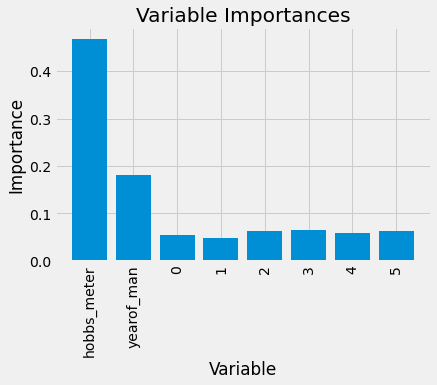

In [77]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances');

In [57]:
# Geting numerical feature importances
importances = list(rf.feature_importances_)
# Listing of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sorting the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Printing out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: hobbs_meter          Importance: 0.47
Variable: yearof_man           Importance: 0.18
Variable:                    2 Importance: 0.06
Variable:                    3 Importance: 0.06
Variable:                    4 Importance: 0.06
Variable:                    5 Importance: 0.06
Variable:                    0 Importance: 0.05
Variable:                    1 Importance: 0.05


[None, None, None, None, None, None, None, None]

In [54]:
# Calculating mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Accuracy: 11.84 %.


In [44]:
xgb = XGBRegressor(n_estimators=100)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=2,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [51]:
# Using the forest's predict method on the test data
predictions_xgb = xgb.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions_xgb - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 10.45 degrees.


In [45]:
xgb.feature_importances_


array([0.12843297, 0.1349989 , 0.0651854 , 0.11117327, 0.1759051 ,
       0.14490321, 0.12810765, 0.11129352], dtype=float32)

TypeError: 'value' must be an instance of str or bytes, not a int

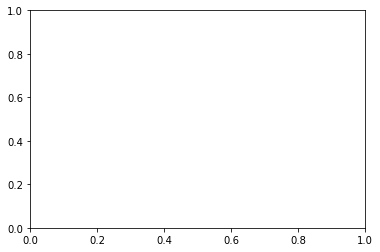

In [43]:
plt.barh(['hobbs_meter','yearof_man',0, 1, 2, 3, 4, 5], xgb.feature_importances_)


## Visualization, Modeling, Machine Learning

Build a regression model to predict how many minutes a flight will be delayed. Please explain the findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model's performance will be evaluated on mean absolute percent error.**
- **Read the test.csv file and prepare features for testing.**

In [69]:
#Loading Test data
test_data=pd.read_csv('test.csv')
test_data.head()

,id,dep_stn,arr_stn,ac_code,dep_date,arr_date,weather,hobbs_meter,year_man,dep_country,arr_country
0,TU 0216,TUN,IST,TU 320IMV,2017-11-08 16:00:00,2017-11-08 18.35.00,stormy,4301,2004-08,Tunisia,Turkey
1,TU 0543,MUC,TUN,TU 320IMU,2017-11-08 16:05:00,2017-11-08 18.10.00,stormy,6117,2011-03,Germany,Tunisia
2,TU 0527,DUS,TUN,TU 32AIMH,2017-11-08 16:20:00,2017-11-08 18.55.00,foggy,7437,2011-03,Germany,Tunisia
3,UG 0011,DJE,TUN,TU 320IMT,2017-11-08 19:00:00,2017-11-08 19.50.00,foggy,8941,2010-01,Tunisia,Tunisia
4,TU 0214,TUN,IST,TU 320IMT,2017-11-09 06:20:00,2017-11-09 08.55.00,foggy,8941,2010-01,Tunisia,Turkey


In [70]:
from sklearn.preprocessing import OneHotEncoder

test_data['yearof_man'] = pd.DatetimeIndex(test_data['year_man']).year

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(test_data[['weather']]).toarray())

#merge one-hot encoded columns back with original DataFrame
test_data = test_data.join(encoder_df)
test_data.head()

,id,dep_stn,arr_stn,ac_code,dep_date,arr_date,weather,hobbs_meter,year_man,dep_country,arr_country,yearof_man,0,1,2,3,4,5
0,TU 0216,TUN,IST,TU 320IMV,2017-11-08 16:00:00,2017-11-08 18.35.00,stormy,4301,2004-08,Tunisia,Turkey,2004,0.0,0.0,0.0,1.0,0.0,0.0
1,TU 0543,MUC,TUN,TU 320IMU,2017-11-08 16:05:00,2017-11-08 18.10.00,stormy,6117,2011-03,Germany,Tunisia,2011,0.0,0.0,0.0,1.0,0.0,0.0
2,TU 0527,DUS,TUN,TU 32AIMH,2017-11-08 16:20:00,2017-11-08 18.55.00,foggy,7437,2011-03,Germany,Tunisia,2011,0.0,1.0,0.0,0.0,0.0,0.0
3,UG 0011,DJE,TUN,TU 320IMT,2017-11-08 19:00:00,2017-11-08 19.50.00,foggy,8941,2010-01,Tunisia,Tunisia,2010,0.0,1.0,0.0,0.0,0.0,0.0
4,TU 0214,TUN,IST,TU 320IMT,2017-11-09 06:20:00,2017-11-09 08.55.00,foggy,8941,2010-01,Tunisia,Turkey,2010,0.0,1.0,0.0,0.0,0.0,0.0


In [71]:
test_data1=test_data[['hobbs_meter','yearof_man',0, 1, 2, 3, 4, 5]]
X_test=test_data1.to_numpy()


In [72]:
predictions = rf.predict(X_test)

In [67]:
predictions

array([20.26978925, 22.49775495, 23.03832447, ..., 22.11698013,
       17.46930779, 22.11698013])


**Describe the most important features of the model to management.**

> #### Task:
- **Visualize the top 10 features and their feature importance.**


In [78]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: hobbs_meter          Importance: 0.47
Variable: yearof_man           Importance: 0.17
Variable:                    4 Importance: 0.07
Variable:                    0 Importance: 0.06
Variable:                    2 Importance: 0.06
Variable:                    3 Importance: 0.06
Variable:                    5 Importance: 0.06
Variable:                    1 Importance: 0.05


[None, None, None, None, None, None, None, None]

> #### Task:
- **Submit the predictions on the test dataset using the optimized model** <br/>
    For each record in the test set (`test.csv`), predict how many minutes a flight will be delayed. Submit a CSV file with a header row and one row per test entry.

The file (`submissions.csv`) should have exactly 2 columns:
   - **id**
   - **delay**

In [74]:
test_data['delay']=list(predictions)
test_data.head()

,id,dep_stn,arr_stn,ac_code,dep_date,arr_date,weather,hobbs_meter,year_man,dep_country,arr_country,yearof_man,0,1,2,3,4,5,delay
0,TU 0216,TUN,IST,TU 320IMV,2017-11-08 16:00:00,2017-11-08 18.35.00,stormy,4301,2004-08,Tunisia,Turkey,2004,0.0,0.0,0.0,1.0,0.0,0.0,20.269789
1,TU 0543,MUC,TUN,TU 320IMU,2017-11-08 16:05:00,2017-11-08 18.10.00,stormy,6117,2011-03,Germany,Tunisia,2011,0.0,0.0,0.0,1.0,0.0,0.0,22.497755
2,TU 0527,DUS,TUN,TU 32AIMH,2017-11-08 16:20:00,2017-11-08 18.55.00,foggy,7437,2011-03,Germany,Tunisia,2011,0.0,1.0,0.0,0.0,0.0,0.0,23.038324
3,UG 0011,DJE,TUN,TU 320IMT,2017-11-08 19:00:00,2017-11-08 19.50.00,foggy,8941,2010-01,Tunisia,Tunisia,2010,0.0,1.0,0.0,0.0,0.0,0.0,24.323206
4,TU 0214,TUN,IST,TU 320IMT,2017-11-09 06:20:00,2017-11-09 08.55.00,foggy,8941,2010-01,Tunisia,Turkey,2010,0.0,1.0,0.0,0.0,0.0,0.0,24.323206


In [75]:
submission_df=test_data[['id','delay']]

In [76]:
#Submission
submission_df.to_csv('submissions.csv',index=False)